In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [17]:
img1 = cv.imread('images/lines.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('images/watermark.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

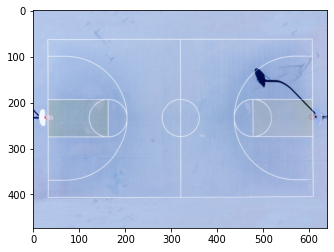

In [18]:
plt.imshow(img1)

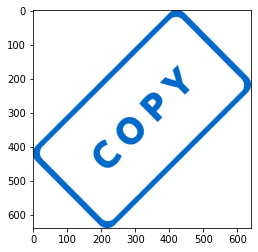

In [19]:
plt.imshow(img2)

In [20]:
img1.shape

(473, 640, 3)

In [21]:
img2.shape

(639, 640, 3)

In [22]:
# Blending images of the same size

In [24]:
img1 = cv.resize(img1, (640, 640))
img2 = cv.resize(img2, (640, 640))

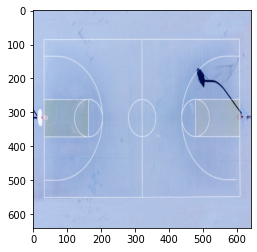

In [31]:
plt.imshow(img1)

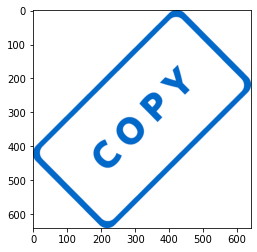

In [32]:
plt.imshow(img2)

In [69]:
blended = cv.addWeighted(src1=img1, alpha=0.9, src2=img2, beta=0.1, gamma=0)

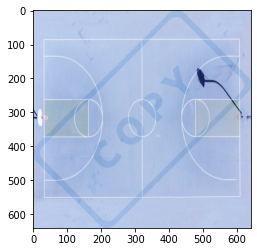

In [70]:
plt.imshow(blended)

In [72]:
# Overlay small image on top of a larger image (no blending)
# Numpy reassignment

In [152]:
img1 = cv.imread('images/lines.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('images/watermark.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

In [153]:
img2 = cv.resize(img2, (280, 340))

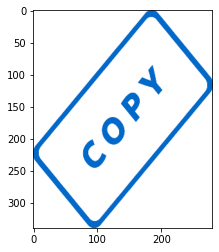

In [154]:
plt.imshow(img2)

In [155]:
large_img = img1
small_img = img2

In [156]:
x_offset = 40
y_offset = 65

In [157]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [158]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

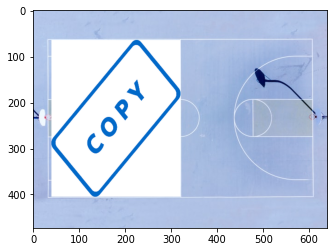

In [159]:
plt.imshow(large_img)

In [160]:
# Blend together images of different sizes

In [5]:
img1 = cv.imread('images/lines.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('images/watermark.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

In [6]:
img2 = cv.resize(img2, (200, 200))

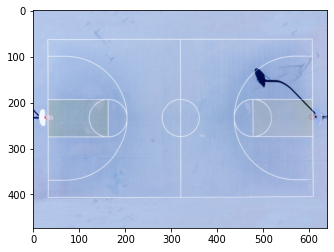

In [7]:
plt.imshow(img1)

In [8]:
img1.shape

(473, 640, 3)

In [9]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]

In [10]:
rows, cols, channels = img2.shape

In [11]:
roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]

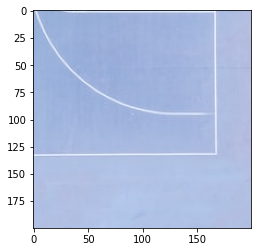

In [12]:
plt.imshow(roi)

In [13]:
mask = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)

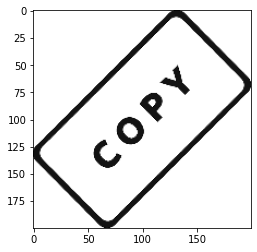

In [14]:
plt.imshow(mask, cmap='gray')

In [15]:
# Inverse
mask_inv = cv.bitwise_not(mask)

In [16]:
mask_inv.shape

(200, 200)

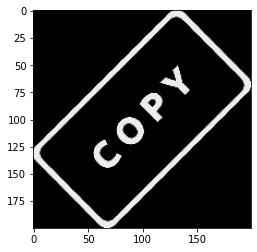

In [17]:
plt.imshow(mask_inv, cmap='gray')

In [18]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)
white_background.shape

(200, 200, 3)

In [ ]:
bk = cv.bitwise_or(white_background, white_background, mask=mask_inv)

In [ ]:
plt.imshow(bk)

In [ ]:
bk.shape

In [ ]:
fg = cv.bitwise_or(img2, img2, mask=mask_inv)

In [ ]:
plt.imshow(fg)

In [ ]:
final_roi = cv.bitwise_or(roi, fg)

In [ ]:
plt.imshow(final_roi)

In [ ]:
large_img = img1
small_img = final_roi
small_img.shape

In [242]:
large_img[y_offset:y_offset + small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

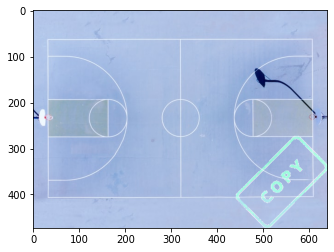